# Tip

- scale the variable
- dont forget to center

# Principal Component Analysis

# Importing Library

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

# Load Data

In [5]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

In [6]:
df_features = iris.frame
df_features['target'] = iris.target
target_names = [iris.target_names[i] for i in iris.target.unique()]
df_features['target'] = iris.target.map({i: name for i, name in enumerate(target_names)})
df_features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# On - Off
# Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [8]:
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
# X_pca = pca.fit_transform(X_scaled)

In [9]:
colors = ["navy", "turquoise", "darkorange"]

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

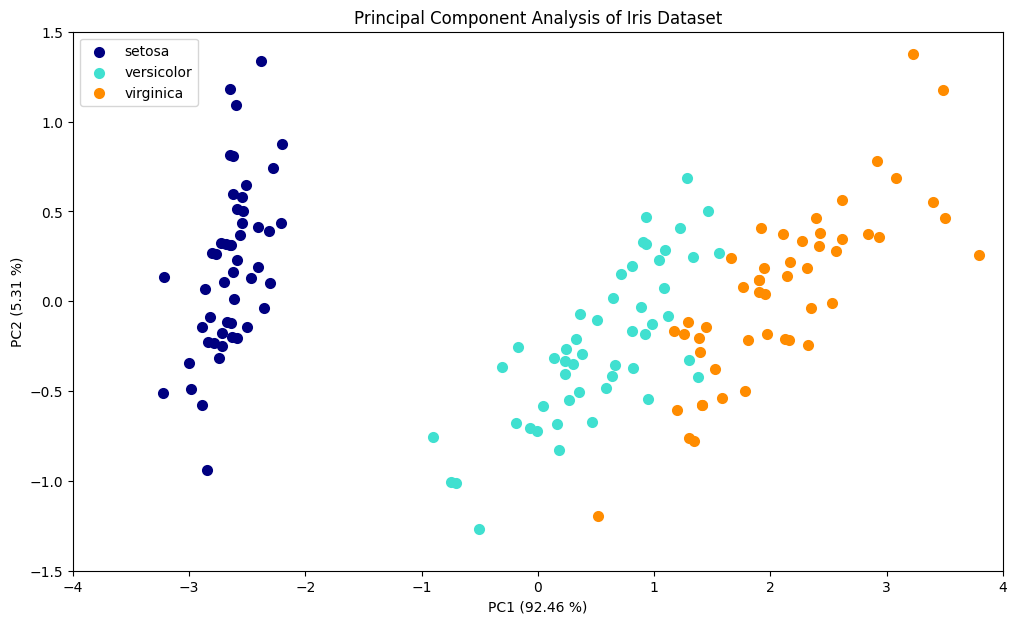

In [10]:
for X_transformed in [(X_pca)]:
    plt.figure(figsize=(12, 7))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name)

        plt.title("Principal Component Analysis" + " of Iris Dataset")
        plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f} %)")
        plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f} %)")
        plt.legend(loc="best", shadow=False, scatterpoints=1)
        plt.axis([-4, 4, -1.5, 1.5])

plt.show()

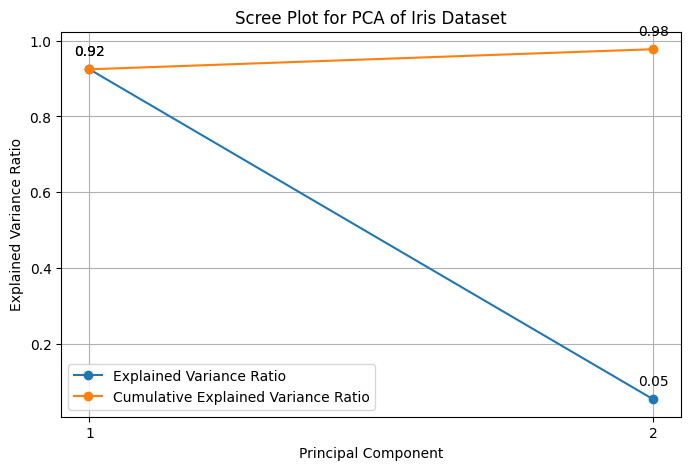

In [30]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, n_components + 1), explained_variance_ratio, marker='o', linestyle='-', label='Explained Variance Ratio')
plt.plot(np.arange(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='-', label='Cumulative Explained Variance Ratio')

plt.title('Scree Plot for PCA of Iris Dataset')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, n_components + 1))
plt.legend()
plt.grid(True)

# Annotate each point with its value
for i, (x, y) in enumerate(zip(np.arange(1, n_components + 1), explained_variance_ratio)):
    plt.annotate(f'{explained_variance_ratio[i]:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for i, (x, y) in enumerate(zip(np.arange(1, n_components + 1), cumulative_variance_ratio)):
    plt.annotate(f'{cumulative_variance_ratio[i]:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


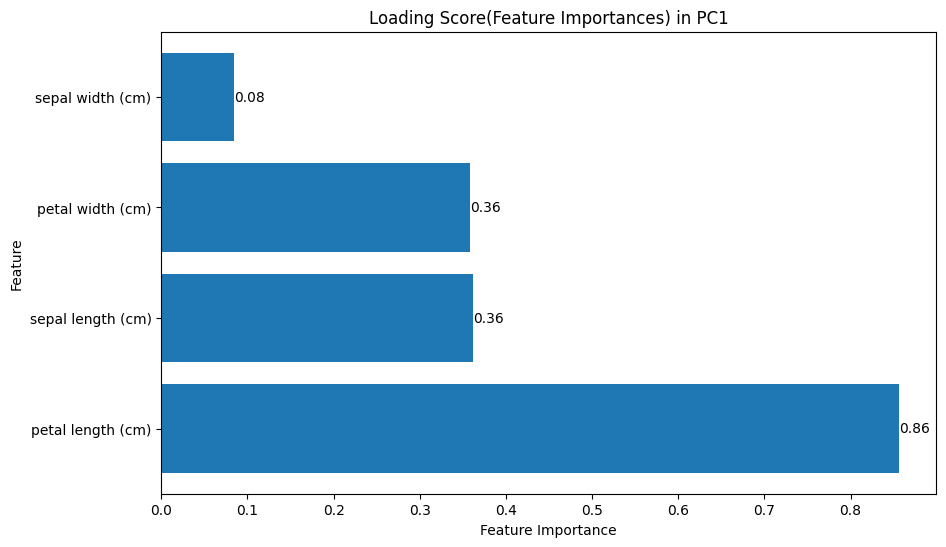

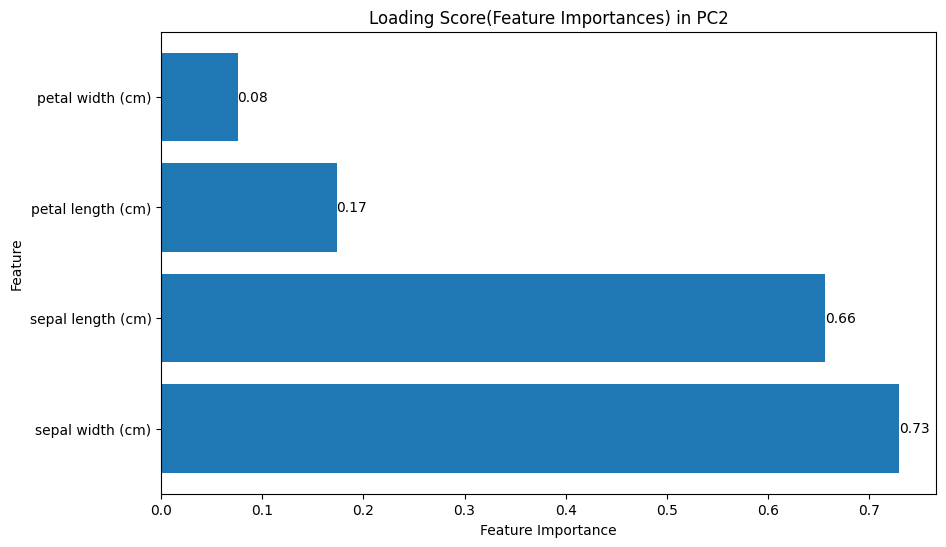

In [39]:
def plot_feature_importances(importances, feature_names, title):
    plt.figure(figsize=(10, 6))
    sorted_idx = importances.argsort()[::-1]
    plt.barh(range(len(importances)), importances[sorted_idx], align='center')
    plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(title)
    
    # Annotate each bar with its value
    for i, v in enumerate(importances[sorted_idx]):
        plt.text(v, i, f'{v:.2f}', color='black', ha='left', va='center')
    plt.show()

# Get feature importances (absolute values of PCA components)
feature_importances = np.abs(pca.components_)

# Plot feature importances for each principal component
for i in range(n_components):
    plot_feature_importances(feature_importances[i], iris.feature_names, f'Loading Score(Feature Importances) in PC{i+1}')
